In [1]:
import numpy as np
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

In [2]:
rng = np.random.RandomState(42)

N1 = 30
N2 = 20
Y1 = rng.normal(loc=0.0, scale=5, size=N1)
Y2 = rng.normal(loc=1.0, scale=4, size=N2)

In [3]:
# for stan
data = {
    "N1": N1,
    "N2": N2,
    "Y1": Y1,
    "Y2": Y2
}

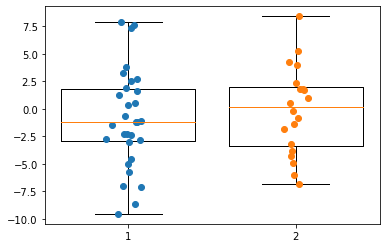

In [4]:
ax = plt.subplot(111)
ax.boxplot([Y1, Y2], widths=[0.8, 0.8])
ax.plot(np.ones_like(Y1) + rng.normal(0, 0.05, len(Y1)), Y1, 'o')
ax.plot(2*np.ones_like(Y2) + rng.normal(0, 0.05, len(Y2)), Y2, 'o')
plt.show()

# Model with common standard deviation

In [5]:
model3 = CmdStanModel(stan_file="model/ex3.stan")
print(model3)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/Chap04/model/ex3


CmdStanModel: name=ex3
	 stan_file=/workdir/Chap04/model/ex3.stan
	 exe_file=/workdir/Chap04/model/ex3
	 compiler_optons=stanc_options=None, cpp_options=None


In [6]:
fit3 = model3.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3


In [7]:
fit3.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-97.199800,0.032711,1.315060,-99.85500,-96.850500,-95.800100,1616.21,11971.9,1.005460
mu1,-0.933802,0.013509,0.831324,-2.30702,-0.937769,0.441309,3787.05,28052.2,1.000370
mu2,-0.120246,0.017490,0.994293,-1.74542,-0.141278,1.502720,3231.66,23938.2,1.001470
sigma,4.438130,0.008519,0.475284,3.73786,4.398040,5.286940,3112.34,23054.4,0.999933


In [8]:
sample_mu1 = fit3.stan_variable("mu1")
sample_mu2 = fit3.stan_variable("mu2")

print("P[mu1 < mu2] :", (sample_mu1 < sample_mu2).sum() / len(sample_mu1))

P[mu1 < mu2] : 0.74025


# Model with (possibly) different standard deviations

In [9]:
model5 = CmdStanModel(stan_file="model/ex5.stan")
print(model5)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/Chap04/model/ex5


CmdStanModel: name=ex5
	 stan_file=/workdir/Chap04/model/ex5.stan
	 exe_file=/workdir/Chap04/model/ex5
	 compiler_optons=stanc_options=None, cpp_options=None


In [10]:
fit5 = model5.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4


In [11]:
fit5.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-96.063800,0.032406,1.430640,-98.78110,-95.758200,-94.393700,1949.04,12907.5,1.002800
mu1,-0.948125,0.013532,0.865476,-2.33776,-0.957393,0.472273,4090.28,27087.9,0.999691
mu2,-0.123400,0.015511,0.955944,-1.69612,-0.105767,1.425650,3798.28,25154.2,0.999878
sigma1,4.703740,0.009986,0.637394,3.80644,4.636650,5.840040,4074.25,26981.8,0.999478
sigma2,4.301150,0.013001,0.773772,3.24300,4.188670,5.751500,3542.11,23457.7,1.000340


In [12]:
sample_mu1 = fit5.stan_variable("mu1")
sample_mu2 = fit5.stan_variable("mu2")

print("P[mu1 < mu2] :", (sample_mu1 < sample_mu2).mean())

P[mu1 < mu2] : 0.746
